![](chapter-1-cover.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style("whitegrid")

# Chapter 1: Primer on Marketing Science

> *Keywords for this chapter: Marketing Science, CLV, CLTV, ROI, ROAS, ROMI, CAC*

## What is Marketing Science Anyway?

Marketing activities existed for a long time, but some scholars agree that it had its formal start after the end of the Second World War in 1945 in response to the high competition that arose from that time on. Given that scenario, methods and research conducted in other fields like management science and engineering started to get their first applications in marketing. Mathematical methods, psychological studies, and fields that were formerly unrelated to marketing started to get their first applications in optimizing marketing endeavors. At the time, the computational power and data available were nothing compared with what we have today. Today you were probably already impacted by the efforts of marketing science. For instance, when doing a Google search you probably saw "promoted" websites as the top recommended answers to your search. That was not randomly suggested to you, a lot of mathematical methods aligned with business logic were processed to deliver the exactly promoted websites to you. Also when buying something online, you probably saw a section with other "recommended" products. In a nutshell, this is part of what marketing science is. I like to quote [Meta's marketing science department definition](https://www.facebook.com/facebookcareers/videos/296529144406713/):

```{epigraph}
"Marketing Science transforms marketing efforts so that they are grounded in data and science"

— Meta Marketing Science Department
```

We agree that science is a broad term, so the first thing that we're going to align from now on is in which scientific part of marketing we're going to focus on: the mathematical part. Hence, we're going to focus on mathematical methods for optimizing, transforming, and understanding marketing efforts. These methods will range from very simple heuristics (like the ones that we'll see in this chapter) to more complex mathematical models and algorithms. With that goal in mind, we'll dive into the first basic concepts of Marketing.

## Basic Concepts for Understanding Marketing Endeavours

There are a couple of basic metrics that are very useful when working with any kind of business. That is a lot of them, but for now, we'll focus on the ones that are more useful for this session, and dive more into the others as they are necessary. These metrics are:

- Customer Lifetime Value (CLV)

- Customer Acquisition Cost (CAC)

- Return on Advertisement Spend (ROAS)

### Customer Lifetime Value

What is the "value" of a customer[^1]? This is usually the first question that you would like to answer when analyzing any business, mainly subscription-based ones (e.g. SaaS). The word value can have several definitions, but usually, when answering this question, we are interested in the net profit that our relationship with the customer will bring to the business. When we have this in mind we are usually talking about the *Customer Lifetime Value* or *CLV*. We can define the CLV as: "The present value of the future cash flows attributed to the customer during his/her entire relationship with the company". So it basically means how much net profit we expect from this customer during his entire relationship with us, or in his relationship with us after a given period of time

You can find out there a lot of fancy and complex forms for calculating the CLV, for the sake of simplicity we'll use a simpler version. There are a couple factors that we need to take into account when calculating the CLV. The first one is the *Average Customer Revenue* ($\overline{Revenue}$), which represents the gross revenue that we get on average by each customer in a given period of time $i$. The second factor is the *Gross Margin* ($GM$) that basically is the percentage of the gross revenue that is considered profit to the business, after discounting all the operational costs necessary for having that customer (e.g. product production cost, retention cost etc). The last one is the *Churn Rate* ($CR$), which is the percentage of customers that after a given period of time $i$ are expected to end their relationship with us (or the probability that this customer will churn after a given period of time $i$).

With these factors in mind, we can define a simple version of CLV as:

```{math}
\tag{1.0} CLV = \frac{\overline{Revenue} \times GM}{CR}
```

````{prf:example}
:label: example-eq-10

If we have a 10% churn rate, with 150 of revenue and 70% of gross margin. Then:


```{math}
CLV = \frac{200 \times 0.7}{0.1} = 1050
```

We can notice that we can model $CR$ as a geometric distribution with $p=CR$ and $q=1-CR$. So assuming a fixed $\overline{Revenue}$, $GM$, and $CR$, we can calculate the $CLV$ after a number $n$ of $i$ periods as:

```{math}
\tag{1.1} CLV_n = \sum_{i=1}^{n} \frac{\overline{Revenue} \times GM}{(1 - CR)^{i-1} \times CR}
```

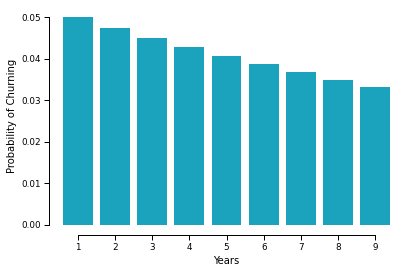

In [34]:
p = 0.05
prob = [(1-p)**(n-1)*p for n in range(1, 10)]

plt.subplots(figsize=(6,4))
sns.barplot(x=list(range(1, 10)), y=prob, color='#00B4D8')
plt.xlabel('Years', fontsize=10)
plt.ylabel('Probability of Churning', fontsize=10)
sns.despine(offset=10, trim=True)
sns.set_context("paper")
plt.savefig('./fig/11.jpg', dpi=200, bbox_inches='tight')
plt.show()

`````{admonition} Modeling churn as a geometric distribution
:class: tip

We can elaborate more on the statement that our churn rate can be modeled as a geometric distribution. The geometric distribution states what is the probability of something occurring after a given number of events (or Bernoulli trials, statistically speaking). In that case, we can consider passing a given period $i$ (e.g. one year) as an event, and then the churn probability of a customer in the first year is different than in the second, the third, and so on.

For example, consider that the probability of a customer churning in 1 year is 5%. Then the probability of a customer churning in the second year is the probability of the customer not churning in the first year, and churning the second. The probability of a customer not churning in the first year is $1-CR$, which gives the equation:

```{math}
(1-CR) \times CR
```

If we want to calculate the probability of a customer churning after 3 years, that means that the customer must not churn in the first 2 and churn in the third:

```{math}
(1-CR) \times (1-CR) \times CR = (1-CR)^2 \times CR
```

So for any number of years $n$, the chance of a customer churning is the probability of the customer not churning $n-1$ times multiplied by the chance of the customer churning in the $n_{th}$ year:

```{math}
(1-CR)^{n-1} \times CR
```

We can plot the probability of a customer churning for each year as:

```{figure} ./fig/11.jpg
---
scale: 40%
align: center
---
Geometric distribution showing the probability of a customer churning for each year
```

Note that a geometric distribution assumes independence between each $i$, which may not be a fair assumption since the chances of a customer churning do not remain the same every year.

Obviously, this is a very naive estimator, fancier and more exact ways to calculate it take into account that our $\overline{Revenue}$, $GM$, and $CR$ are not the same for each period $i$. For instance, one can find the assumption that your $\overline{Revenue}$ by the customer for the year 2022 will be equal to the year 2023 a strong one. Furthermore, mainly for young companies it is not advisable to extrapolate your current results too long over time (i.e. have a high $n$), since you expect, naturally, that the situation of your business will be quite different in $n \times i$ periods. Another fact that we didn't take into account is the *discount* or *cost of capital* factor. More complex and correct ways to calculate $CLV$ will be covered as necessary, but for now, we must mind our assumptions with this simple model.

### Customer Acquisition Cost

This concept is maybe the most straightforward one. In any kind of marketing, you aim to prospect new customers. But this comes at a cost, you need to buy the attention of these potential new customers. For instance, let's get back to the example at the beginning of the chapter. A company had to pay to appear in the promoted session of your search engine. This *spend* has a crucial role in marketing campaigns, since the more customers you prospect with the lower the spend possible the better. In order words, given that $CA$ is the number of acquired customers due to the marketing campaign, the lower the ratio $Spend:CA$ the better. Hence, our *Customer Acquisition Cost* or *CAC* can be intuitively defined as:

```{math}
\tag{1.2} CAC = \frac{Spend}{CA}
```

````{prf:example}
:label: example-eq-12

If we spent 5250 in a marketing campaign that resulted in 642 new customers. Then each customer cost 8.17.


```{math}
CAC = \frac{5250}{642} = 8.17
```

One can also notice that the ratio of $CLV$ to $CAC$ is also important, it basically how much times expected value of that customer is greater than the cost to acquire that customer. The intuition of this relationship naturally bring us to the next basic concept.

### Return on Advertisement Spend

The idea behind the return on some kind of investment has been around for a quite long time. Intuitively, one wants his investment in a given endeavor to return more profit than that given investment. You may already have heard of *Return on Investment* or *ROI* in the business world. Nevertheless, an investment in marketing is intrinsically tied up with some kind of **risk**. One cannot assure a return on a marketing investment, it can be very successful or a total failure. More complex even, something that worked out once may not work if applied twice, see for example what happened to Pepsi Crystal in the 1990s. Hence, it's reasonable that in the 1990s terms like *ROMI* (*Return on Marketing Investment*) started to appear more often, since they tried to separate the usual investments made by the company from the more risky marketing efforts.

Another important fact is that when we talk about ROMI we are usually talking about the *entire* marketing efforts. What does it mean? It means that if we have several marketing campaigns, we are usually talking about the effectiveness of them as a whole. ROMI is then defined as:

```{math}
\tag{1.3} ROMI = \frac{\text{Total Marketing Revenue} - \text{Marketing Costs}}{\text{Marketing Costs}}
```

As you can imagine, marketing costs can cover a variety of things, like campaign investments, discounts, etc. A $ROMI>1$ means that the investment is paying off. But which metric do we use when we are talking about *individual* marketing campaigns? In that case, we are ideally talking about our *Return on Advertisement Spend* or *ROAS*. This metric concerns our specific returns on marketing advertisement (i.e. marketing campaigns). It follows a similar logic, but is a constrained version of $ROMI$:


```{math}
\tag{1.4} ROAS = \frac{\text{Campaign Revenue}}{\text{Campaign Spend}}
```

Based on the equation $1.4$ we can elaborate more on the formulation of $ROAS$ given the concepts that we already introduced

$$\begin{align}
ROAS &= \frac{\text{Campaign Revenue}}{\text{Campaign Spend}} \tag{1.5} \\
&= \frac{CA \times CLV}{Spend} \\
&= \frac{Spend \times CLV}{CAC} \times \frac{1}{Spend} \\
&= \frac{CLV}{CAC}
\end{align}$$

As we can see from equation $1.5$, our ROAS boils down to the concept of the ratio of $CLV$ to $CAC$. This has a series of interesting implications, which we'll analyze a bit further.

Recall that when we defined our $CLV$, it was the expected return that we would get from a customer after a given period $i$. It implies that to some extent, we expect our $CLV$ to remain static in our calculations: it's the *expected* or *average* profit of the customer. That means that our $ROAS$ function will take the form: $f(x) = \frac{c}{x}$. This will lead to a couple of interesting corollaries:

```{prf:corollary}


Given a $CLV>0$ and $CAC>0$, our $ROAS$ function will never achieve zero.
```

````{prf:proof}


We can prove this as we take the limit of our $ROAS$ function as $CAC$ goes towards $+\infty$.

```{math}
\tag{1.6}\lim_{CAC \to +\infty} \frac{CLV}{CAC} = \frac{CLV}{\infty} = 0
```

Also, this can be seen in the limit of the partial derivative of the $ROAS$ function.

```{math}
\tag{1.7}\frac{\partial}{\partial CAC} \left[\frac{CLV}{CAC}\right] = -\frac{CLV}{CAC^2}
```
```{math}
\lim_{CAC \to +\infty} -\frac{CLV}{CAC^2} = -\frac{CLV}{\infty ^2} = 0
```
````

This can be seen in Fig 2, as our $CAC$ increases, our $ROAS$ function tends towards zero.

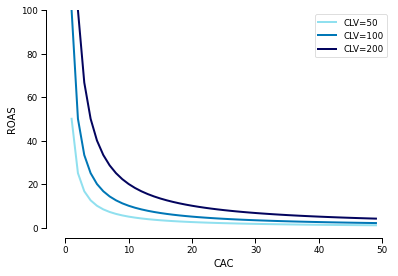

In [33]:
cac = list(range(1, 50))

plt.subplots(figsize=(6,4))
sns.lineplot(x=cac, y=[50/c for c in cac], linewidth=2, label='CLV=50', color='#90E0EF')
sns.lineplot(x=cac, y=[100/c for c in cac], linewidth=2, label='CLV=100', color='#0077B6')
sns.lineplot(x=cac, y=[200/c for c in cac], linewidth=2, label='CLV=200', color='#03045E')
plt.xlabel('CAC', fontsize=10)
plt.ylabel('ROAS', fontsize=10)
plt.ylim([0, 100])
sns.despine(offset=10, trim=True)
sns.set_context("paper")
plt.savefig('./fig/12.jpg', dpi=200, bbox_inches='tight')
plt.show()

```{figure} ./fig/12.jpg
---
scale: 40%
align: center
---
ROAS for different CAC while maintaining CLV fixed
```

```{prf:corollary}

The derivative of $ROAS$ will be $-\frac{1}{CLV}$ when $ROAS=1$.
```

````{prf:proof}

Notice that when $ROAS=1$ that implies that $CLV=CAC$. Given that, we can show:

```{math}
\tag{1.8} -\frac{CLV}{CAC^2} = -\frac{CLV}{CLV^2} = -\frac{1}{CLV}
```
````

Even though ROAS and ROMI are very straightforward and widely used concepts, they also have their limitations. One of the limitations is that they just focus on immediate profit or sales, while a marketing campaign may have several goals. For instance, a marketing campaign may also focus on increasing brand awareness, or even change the perception that people have of a brand. That's why, for example, the researcher Rex Briggs suggested the *ROMO* (Return on Marketing Objectives) metric, emphasizing that a marketing effort has a *range of objectives*. That links with the fact that ROAS is a *short-term* metric, that is, it is not suited for long-term effects of marketing like the effect of increased brand awareness, consideration, or purchase intent.

As we saw from the previous corollaries, our $ROAS$ will never be equal to zero. However, we want our $ROAS$ to never be less than $1$, which means that we are "receiving back" as revenue from the customer all the money we spent to acquire him. In the industry, there are some "magical numbers" that reflect a good ROAS for your business, but they must be taken with a grain of salt. Additionally, we saw that it has several limitations. Several companies aim to find the best ROAS threshold to maximize their business returns. How to find the optimal ROAS for a marketing effort then? Before diving more into techniques for optimizing marketing effort returns, there is a phenomenon that we must know: Diminishing Returns.

***

**Bibliography:**

1. Farris, Paul W.; Neil T. Bendle; Phillip E. Pfeifer; David J. Reibstein (2010). Marketing Metrics: The Definitive Guide to Measuring Marketing Performance. Upper Saddle River, New Jersey: Pearson Education, Inc. ISBN 0-13-705829-2. The Marketing Accountability Standards Board (MASB) endorses the definitions, purposes, and constructs of classes of measures that appear in Marketing Metrics as part of its ongoing Common Language in Marketing Project

2. Powell, Guy R., Return on Marketing Investment: Demand More From Your Marketing And Sales Investments (2003) RPI Press. ISBN 0-9718598-1-7

3. Lenskold, James, Marketing ROI: The Path to Campaign, Customer, and Corporate Profitability (2003) McGraw-Hill ISBN 0-07-141363-4
2006 What Sticks, Kaplan ISBN 1-4195-8433-2

4. Winer, R. S., & Neslin, S. A. (2014). The History Of Marketing Science. 	World Scientific, ISBN 9814596493, 9789814596497


[^1]: In this chapter and from here on we'll use the term customer as the "success" event of a company. This can be either making a contract or selling a service, as in SaaS businesses, or making a sale for example. Not subscription-based companies make the calculation of some metrics a bit trickier, but the concepts are usually equally applicable.